In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import geopy.distance as geo
warnings.filterwarnings(action="ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('../input/availability.csv')

In [4]:
df.describe()

,station_id,latitude,longitude,zip,available_bikes,available_docks
count,284787.000000,284787.000000,284787.000000,284787.000000,284787.000000,284787.000000
mean,2408.979083,40.732422,-73.975298,10373.177245,10.809500,19.576764
std,1417.711594,0.038810,0.030936,959.238298,10.218132,13.573926
min,72.000000,40.655400,-74.083639,7302.000000,0.000000,0.000000
25%,473.000000,40.701907,-73.993446,10014.000000,2.000000,9.000000
50%,3207.000000,40.728846,-73.975361,10036.000000,8.000000,18.000000
75%,3497.000000,40.762814,-73.952429,11206.000000,17.000000,27.000000
max,3781.000000,40.814394,-73.907744,11249.000000,78.000000,79.000000


In [3]:
df = df[df['station_status'] == 'In Service']
df = df[df['borough'] != 'New Jersey']

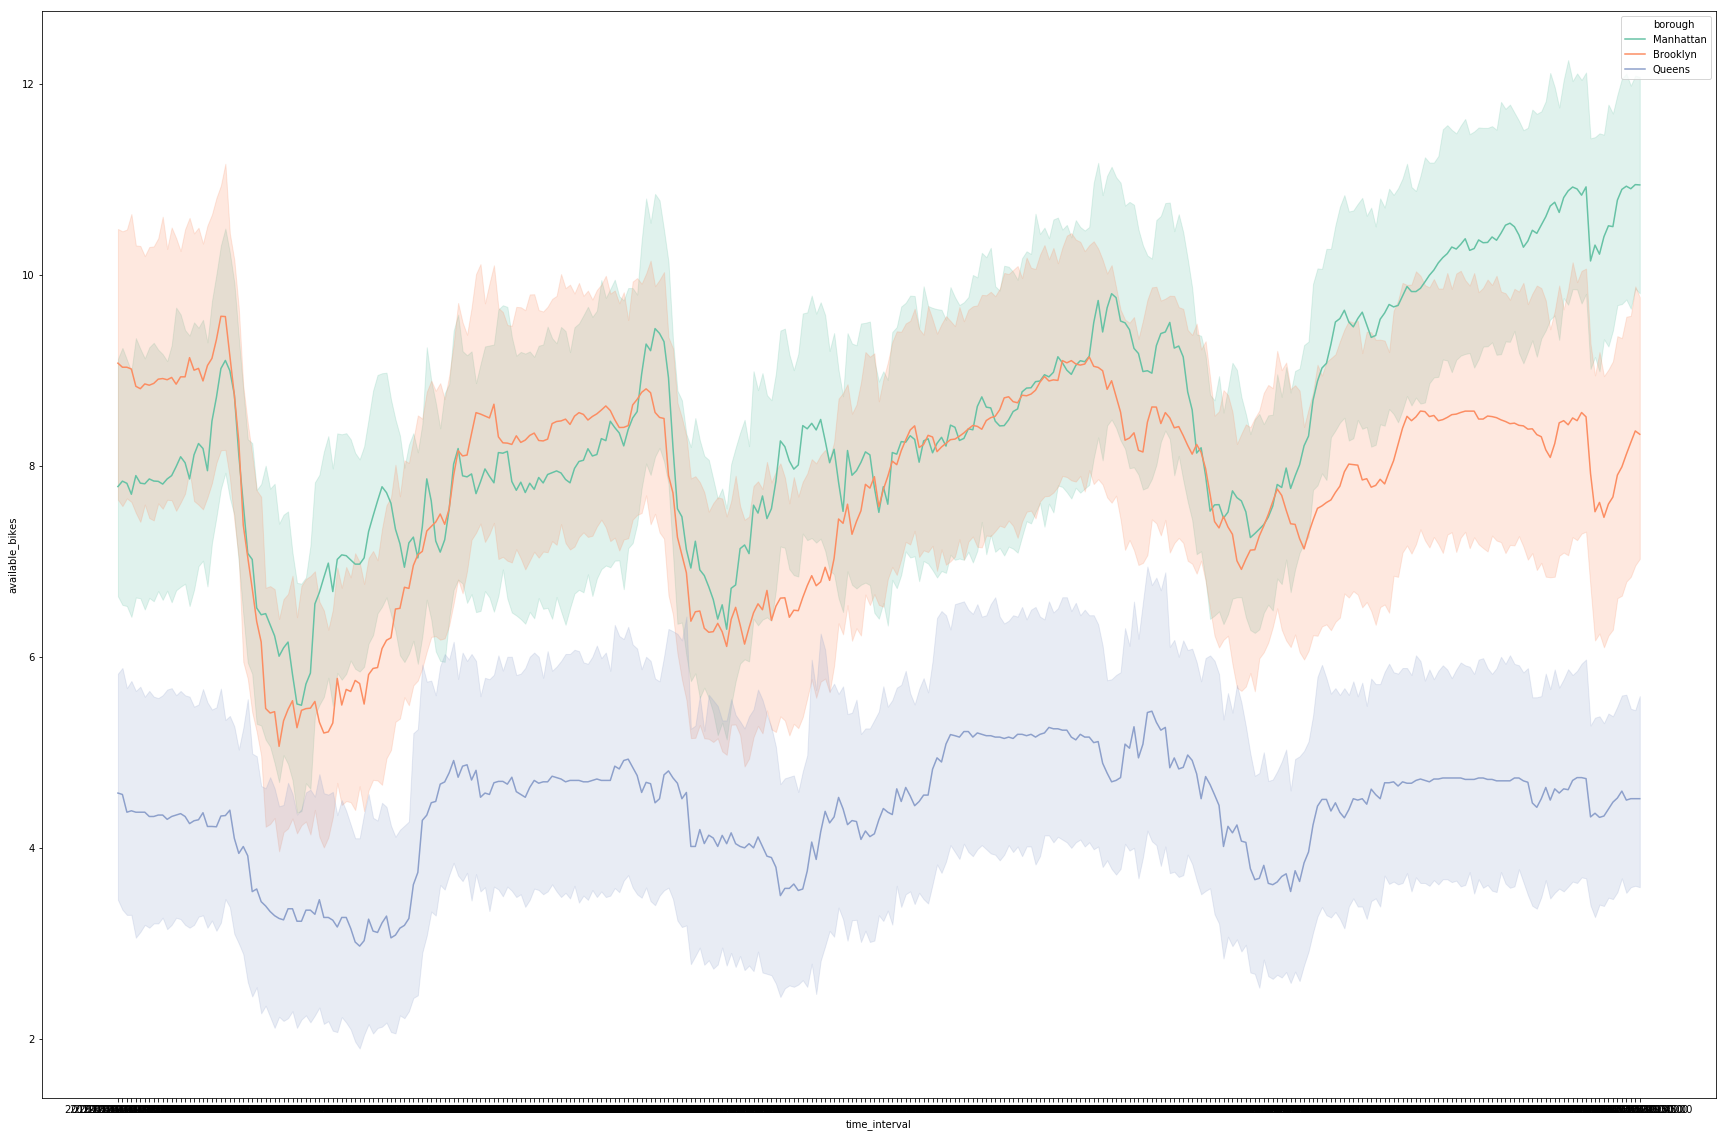

In [7]:
plt.figure(figsize=(30, 20))
sns.set_palette('Set2')
sns.lineplot(x='time_interval', y='available_bikes', data=df, hue='borough', ci=99)

In [4]:
df['hour'] = df['time_interval'].apply(lambda x: x.split(' ')[0] + ' ' + x.split(' ')[1].split(':')[0] + ':00:00')

In [5]:
hoods = df.groupby(['borough','hood', 'hour'])['available_bikes','available_docks', 'hour'].sum().reset_index()
hoods['total_available'] = hoods.apply(lambda x: x['available_bikes'] + x['available_docks'], axis=1)
hoods['percent_available'] = hoods.apply(lambda x: x['available_bikes'] / x['total_available'], axis=1)
hoods_filtered = hoods[hoods['total_available'] > 767]

In [22]:
hoods.describe()

,available_bikes,available_docks,total_available,percent_available
count,7310.000000,7310.000000,7310.000000,7310.000000
mean,401.890014,734.755130,1136.645144,0.385788
std,401.903335,768.189641,1030.740034,0.251583
min,0.000000,0.000000,46.000000,0.000000
25%,92.000000,176.000000,340.000000,0.192226
50%,264.000000,458.500000,767.000000,0.361827
75%,588.000000,1005.000000,1573.000000,0.546691
max,1957.000000,3776.000000,4273.000000,1.000000


In [15]:
df = df[df['available_docks'] > 18]
df_grouped_dayhour = df.groupby(['station_name', 'hour']).sum().reset_index()

In [16]:
df_grouped_dayhour.head()

,station_name,hour,station_id,latitude,longitude,zip,available_bikes,available_docks
0,1 Ave & E 110 St,2019-05-02 08:00:00,6992,81.584654,-147.8766,20058,12,38
1,1 Ave & E 110 St,2019-05-02 09:00:00,13984,163.169309,-295.7532,40116,18,82
2,1 Ave & E 110 St,2019-05-02 10:00:00,13984,163.169309,-295.7532,40116,12,88
3,1 Ave & E 110 St,2019-05-02 11:00:00,13984,163.169309,-295.7532,40116,11,89
4,1 Ave & E 110 St,2019-05-02 12:00:00,13984,163.169309,-295.7532,40116,2,98


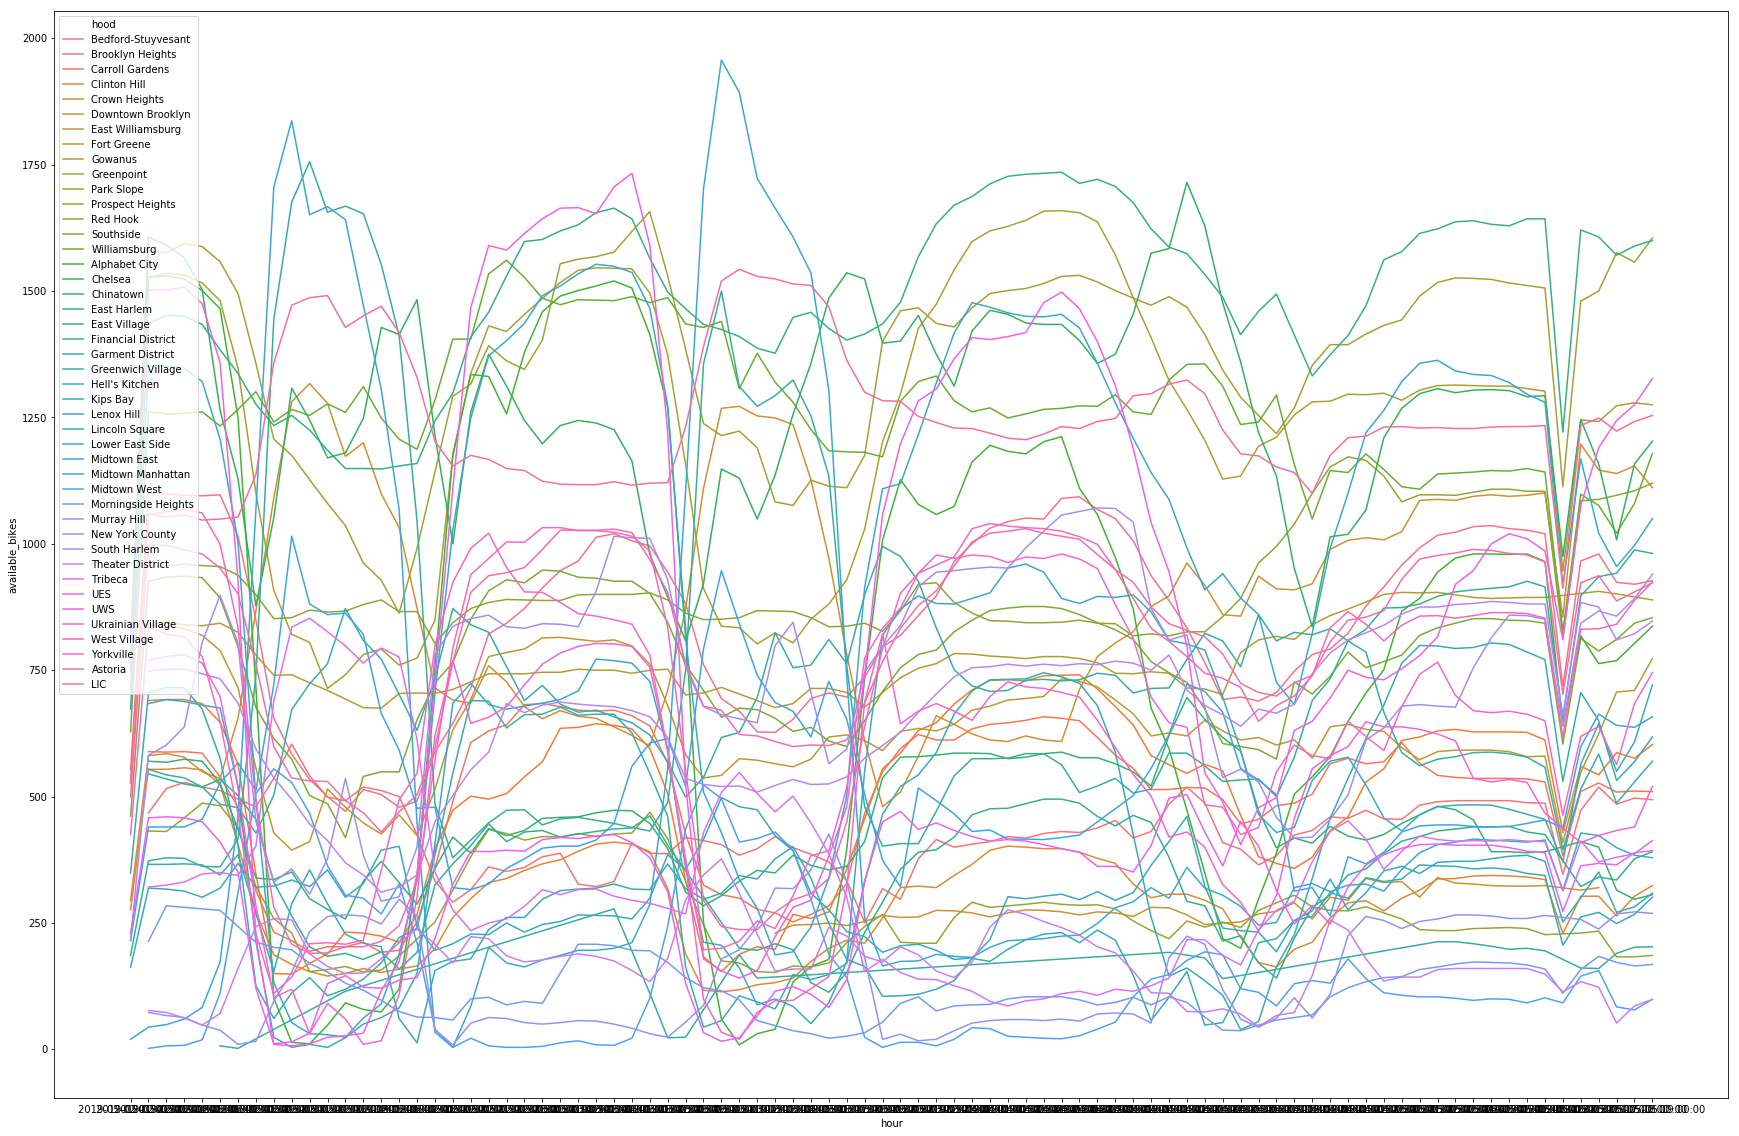

In [24]:
plt.figure(figsize=(30, 20))
sns.set_palette('Set2')
sns.lineplot(x='hour', y='available_bikes', data=hoods_filtered, hue='hood', ci=90)

In [6]:
df['station_name'].unique()

array(['W 52 St & 11 Ave', 'Franklin St & W Broadway',
       'St James Pl & Pearl St', 'Atlantic Ave & Fort Greene Pl',
       'Park Ave & St Edwards St', 'Lexington Ave & Classon Ave',
       'Barrow St & Hudson St', 'MacDougal St & Prince St',
       'Clinton St & Joralemon St', 'Nassau St & Navy St',
       'Hudson St & Reade St', 'E 2 St & Avenue C',
       'Cleveland Pl & Spring St', 'Henry St & Atlantic Ave',
       'LaGuardia Pl & W 3 St', 'E 47 St & 2 Ave', 'E 39 St & 3 Ave',
       'W 18 St & 6 Ave', 'Broadway & W 49 St', 'E 25 St & 1 Ave',
       'Liberty St & Broadway', 'W 16 St & The High Line',
       'Columbia Heights & Cranberry St', 'Old Fulton St',
       'W 13 St & 7 Ave', 'Spruce St & Nassau St', 'E 48 St & 3 Ave',
       'Great Jones St', 'St Marks Pl & 2 Ave', 'E 11 St & 2 Ave',
       'Bank St & Washington St', 'Willoughby St & Fleet St',
       'DeKalb Ave & S Portland Ave', 'Carlton Ave & Flushing Ave',
       'Fulton St & Rockwell Pl', 'Willoughby Ave & Hall S

In [48]:
print(df['station_name'].unique()[0],'\\',df['station_name'].unique()[1])

W 52 St & 11 Ave \ Franklin St & W Broadway


In [57]:
getDistance((40.767272,-73.993929),(40.719116,-74.006667))

5.454822482212743

In [7]:
df = df.groupby(['station_id', 'latitude', 'longitude', 'borough', 'station_status']).mean()

In [8]:
df.head()

,,,,,zip,available_bikes,available_docks
station_id,latitude,longitude,borough,station_status,,,
72,40.767272,-73.993929,Manhattan,In Service,10019.0,4.607038,47.246334
79,40.719116,-74.006667,Manhattan,In Service,10013.0,12.463343,20.029326
82,40.711174,-74.000165,Manhattan,In Service,10038.0,15.255132,10.331378
83,40.683826,-73.976323,Brooklyn,In Service,11217.0,32.870968,27.126100
119,40.696089,-73.978034,Brooklyn,In Service,11205.0,7.865103,7.463343


In [14]:
df = df.reset_index()
df = df.set_index('station_id')
df.shape

(779, 7)

In [23]:
df.loc[72, 'latitude']

40.76727216

In [29]:
def getDistance(x, y):
    return geo.distance(x, y).km

closest_stations = {}

for stationX in df.index:
    closest_stations[stationX] = []
    for stationY in df.index:
        if stationX != stationY:
            try:
                distance = getDistance((df.loc[stationX, 'latitude'], df.loc[stationX, 'longitude']),(df.loc[stationY, 'latitude'], df.loc[stationY, 'longitude']))
                boroughs_match = df.loc[stationX, 'borough'] == df.loc[stationY, 'borough']
                y_in_service = df.loc[stationY, 'station_status'] == 'In Service'
            except:
                print('Error')
                print('x:', stationX)
                print('y:', stationY)
                break
            if distance < .5 and boroughs_match and y_in_service:
                closest_stations[stationX].append({'station_id': stationY, 'distance': distance})
closest_stations

{72: [{'station_id': 480, 'distance': 0.28681067637282787},
  {'station_id': 508, 'distance': 0.48715973353691266},
  {'station_id': 513, 'distance': 0.4597398462789004}],
 79: [{'station_id': 146, 'distance': 0.37911940346835904},
  {'station_id': 248, 'distance': 0.3167854523583481},
  {'station_id': 249, 'distance': 0.202306843375958},
  {'station_id': 257, 'distance': 0.355725625761442},
  {'station_id': 276, 'distance': 0.36764546551286026},
  {'station_id': 320, 'distance': 0.195792901317432},
  {'station_id': 377, 'distance': 0.3785445909688425},
  {'station_id': 3664, 'distance': 0.3296210852308268}],
 82: [{'station_id': 224, 'distance': 0.45396632463534115},
  {'station_id': 279, 'distance': 0.38800954743418203},
  {'station_id': 296, 'distance': 0.42101339414476413},
  {'station_id': 308, 'distance': 0.253524396501165},
  {'station_id': 386, 'distance': 0.4577624231511778},
  {'station_id': 387, 'distance': 0.4133176866230014},
  {'station_id': 2009, 'distance': 0.2821720908

In [35]:
import json

contents = json.dumps(closest_stations)

file = open("nearby_stations.json","a")
file.write(contents)
file.close()

In [66]:
df = df.reset_index()

In [63]:
test_df

,station_name,latitude,longitude,zip,borough,hood,available_bikes,available_docks,time_interval,created_at,station_status,hour
station_id,,,,,,,,,,,,
72,W 52 St & 11 Ave,40.767272,-73.993929,10019,Manhattan,Hell's Kitchen,4,49,2019-05-02 01:30:00,2019-05-04 03:46:05,In Service,2019-05-02 01:00:00
72,W 52 St & 11 Ave,40.767272,-73.993929,10019,Manhattan,Hell's Kitchen,4,49,2019-05-02 01:45:00,2019-05-04 03:46:05,In Service,2019-05-02 01:00:00
72,W 52 St & 11 Ave,40.767272,-73.993929,10019,Manhattan,Hell's Kitchen,4,49,2019-05-02 02:00:00,2019-05-04 03:46:05,In Service,2019-05-02 02:00:00
72,W 52 St & 11 Ave,40.767272,-73.993929,10019,Manhattan,Hell's Kitchen,4,49,2019-05-02 02:15:00,2019-05-04 03:46:05,In Service,2019-05-02 02:00:00
72,W 52 St & 11 Ave,40.767272,-73.993929,10019,Manhattan,Hell's Kitchen,4,49,2019-05-02 02:30:00,2019-05-04 03:46:05,In Service,2019-05-02 02:00:00
72,W 52 St & 11 Ave,40.767272,-73.993929,10019,Manhattan,Hell's Kitchen,4,49,2019-05-02 02:45:00,2019-05-04 03:46:05,In Service,2019-05-02 02:00:00
72,W 52 St & 11 Ave,40.767272,-73.993929,10019,Manhattan,Hell's Kitchen,4,49,2019-05-02 03:00:00,2019-05-04 03:46:05,In Service,2019-05-02 03:00:00
72,W 52 St & 11 Ave,40.767272,-73.993929,10019,Manhattan,Hell's Kitchen,4,49,2019-05-02 03:15:00,2019-05-04 03:46:05,In Service,2019-05-02 03:00:00
72,W 52 St & 11 Ave,40.767272,-73.993929,10019,Manhattan,Hell's Kitchen,4,49,2019-05-02 03:30:00,2019-05-04 03:46:05,In Service,2019-05-02 03:00:00
